In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
advertise_data = pd.read_csv("advertising.csv")

In [3]:
advertise_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# In this we're predicting the regression with the one feature/column

In [4]:
advertise_data["total_spend"] = advertise_data["TV"] + advertise_data["radio"] + advertise_data["newspaper"]

In [5]:
advertise_data

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


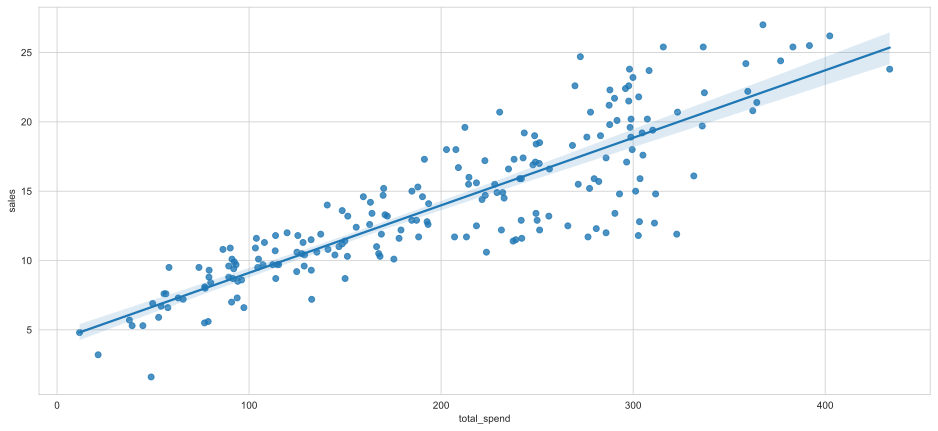

In [6]:
plt.figure(figsize=(16, 7))
sns.regplot(data=advertise_data, x="total_spend", y="sales");

# Regression Line from the Scratch

In [7]:
x = advertise_data["total_spend"]
y = advertise_data["sales"]

In [8]:
advertise_data["x-x_bar"] = x - x.mean()

In [9]:
advertise_data["y-y_bar"] = y - y.mean()

In [10]:
advertise_data["(x-x_bar)(y-y_bar)"] = advertise_data["x-x_bar"] * advertise_data["y-y_bar"]

In [11]:
advertise_data["(x-x_bar)^2"] = np.square(advertise_data["x-x_bar"])

In [12]:
sum_x_x_bar_y_y_bar = np.sum(advertise_data["(x-x_bar)(y-y_bar)"])

In [13]:
sum_x_x_bar_2 = np.sum(advertise_data["(x-x_bar)^2"])

In [14]:
b_1 = sum_x_x_bar_y_y_bar/sum_x_x_bar_2

In [15]:
b_0 = np.mean(y) - b_1*np.mean(x)

In [16]:
y_hat = x.apply(lambda value: b_0 + b_1*value)

In [17]:
spend = np.linspace(0, 501, 100)

In [18]:
predicted_sales = b_0 + b_1*spend

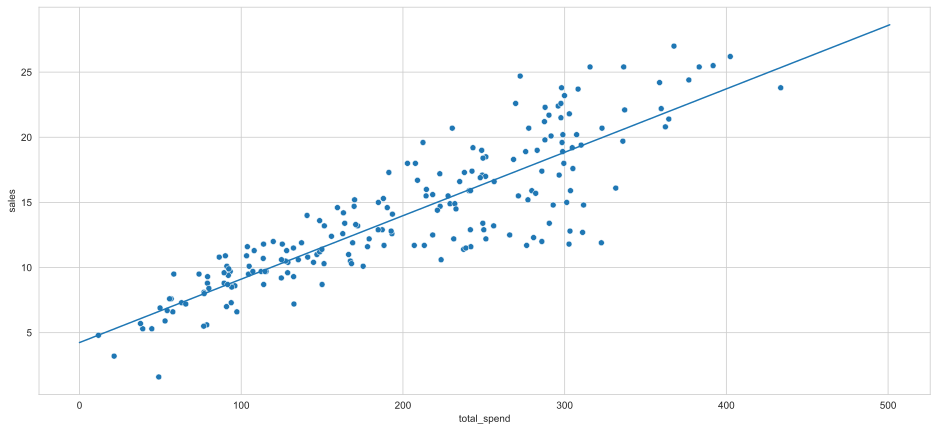

In [19]:
plt.figure(figsize=(16, 7))

sns.scatterplot(data=advertise_data, x="total_spend", y="sales")
plt.plot(spend, predicted_sales);

# Regression Line through the functions

In [20]:
b_1, b_0 = np.polyfit(x, y, deg=1)

In [21]:
spend = np.linspace(0, 501, 100)
predicted_sales = b_0 + b_1*spend

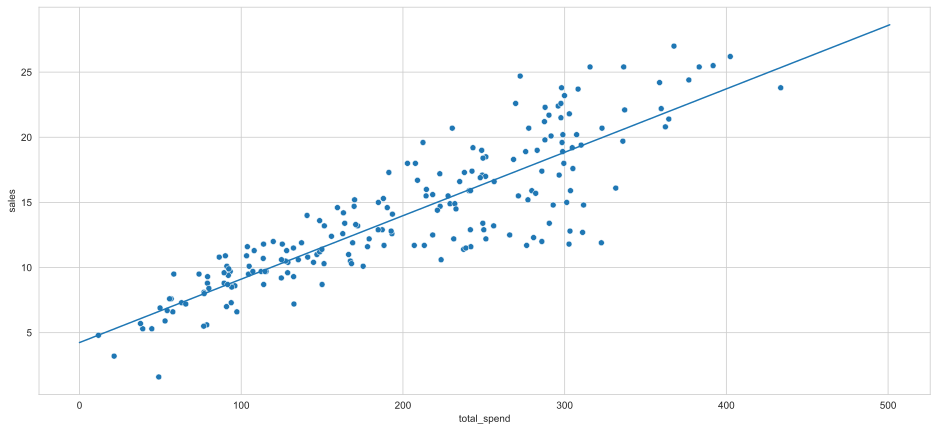

In [22]:
plt.figure(figsize=(16, 7))

sns.scatterplot(data=advertise_data, x="total_spend", y="sales")
plt.plot(spend, predicted_sales);

# Fitting the Data with degree = 3

In [23]:
b_3, b_2, b_1, b_0 = np.polyfit(x, y, deg=3)

In [24]:
predicted_sales = b_3*spend**3 + b_2*spend**2 + b_1*spend + b_0

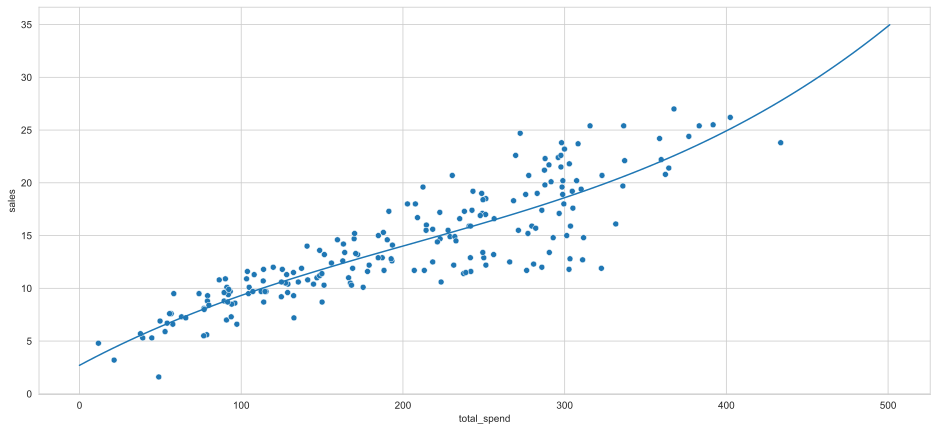

In [25]:
plt.figure(figsize=(16, 7))

sns.scatterplot(data=advertise_data, x="total_spend", y="sales")
plt.plot(spend, predicted_sales);

# Regression using the sklearn (test train split)

In [26]:
advertise_data = pd.read_csv("advertising.csv")
x = advertise_data.iloc[:, :-1].values
y = advertise_data.iloc[:, -1].values

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
pred_y = lin_reg.predict(x_test)

In [30]:
y.mean()

14.0225

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_residuals = y_test - pred_y
mean_absolute_error(y_test, pred_y), np.sqrt(mean_squared_error(y_test, pred_y))

(1.5294148702152435, 1.7863709361059878)

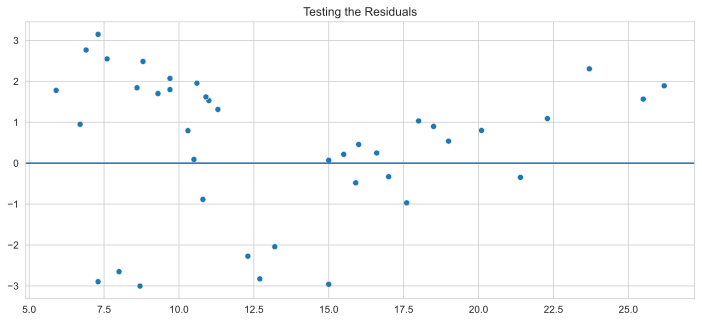

In [32]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_test, y=test_residuals)
plt.title("Testing the Residuals")
plt.axhline(y=0);

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


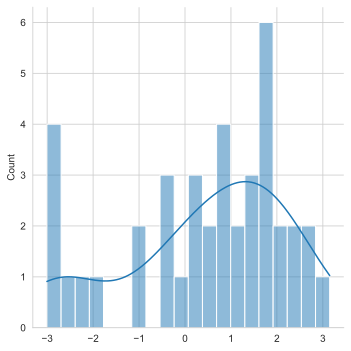

In [33]:
sns.displot(data=test_residuals, bins=20, kde=True);

# Creating the final model of full dataset

In [34]:
final_model = LinearRegression()
final_model.fit(x, y)

LinearRegression()

In [35]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [36]:
from joblib import dump, load
dump(final_model, 'temp.joblib')
model = load("temp.joblib")

In [37]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [38]:
data = [[149, 22, 12]]
final_model.predict(data)

array([13.893032])